In [74]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import glob
import cv2
import pickle

from keras.models import Sequential
from keras.layers import Conv2D
import os

In [75]:

path = "/home/lepton/code/vivekptl9/Anaemia_Classification/DD"
print(os.listdir(path))

SIZE = 512 #Resize images

train_images = []

for directory_path in glob.glob(path +"/Normal"):
    for img_path in glob.glob(os.path.join(directory_path, "*.tif")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        #train_labels.append(label)
        
train_images = np.array(train_images)


['Normal', 'masks']


In [76]:
train_images.shape

(5, 512, 512, 3)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


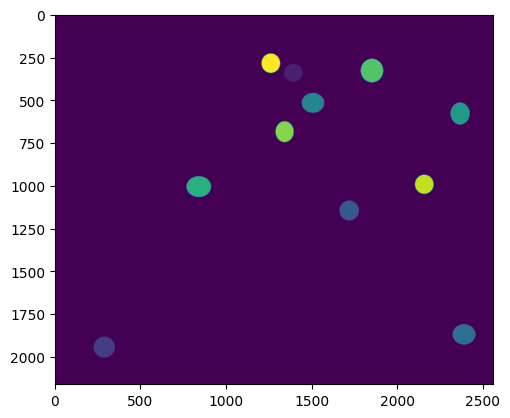

In [113]:
from skimage import io
test_mask_png = io.imread("/home/lepton/code/vivekptl9/Anaemia_Classification/sample_dataset/sample_mask/ground_truth/masks/healthy1.tif")
plt.imshow(test_mask_png)
print (np.unique(test_mask_png))

In [77]:
train_masks = [] 
for directory_path in glob.glob(path+"/masks"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.tif")):
        mask = cv2.imread(mask_path, 0)       
        mask = cv2.resize(mask, (SIZE, SIZE))
        #mask = cv2.cvtColor(mask, cv2.COLOR_RGB2BGR)
        train_masks.append(mask)
        #train_labels.append(label)
        
train_masks = np.array(train_masks)
train_masks.shape

(5, 512, 512)

In [78]:
X_train = train_images
y_train = train_masks
#print(y_train)
y_train = np.expand_dims(y_train, axis=3)
#print(y_train)


In [79]:
activation = 'sigmoid'
feature_extractor = Sequential()
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (SIZE, SIZE, 3)))
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))

#feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
#feature_extractor.add(BatchNormalization())
#
#feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
#feature_extractor.add(BatchNormalization())
#feature_extractor.add(MaxPooling2D())
#feature_extractor.add(Flatten())

In [80]:
X = feature_extractor.predict(X_train)
#print(X.shape)

X = X.reshape(-1, X.shape[3])
print(X.shape)
Y = y_train.reshape(-1)
Y.shape

1/1 [==============================] - 0s 242ms/step
(1310720, 32)


(1310720,)

In [81]:
Y

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [82]:
dataset = pd.DataFrame(X)
dataset['Label'] = Y
# print(dataset['Label'].unique())
# print(dataset['Label'].value_counts())
dataset.shape

(1310720, 33)

In [83]:
dataset["Label"].nunique()

34

In [85]:
dataset["Label"].value_counts()

0      1284246
255      25871
28          26
124         25
68          25
12          25
171         24
227         22
116         22
36          22
52          21
76          21
108         21
84          20
163         19
139         19
211         19
100         19
92          19
251         18
243         18
131         17
147         17
44          17
20          17
179         16
219         16
4           16
195         15
155         14
187         14
203         13
60          13
235         13
Name: Label, dtype: int64

In [93]:
dataset.loc[dataset['Label'] > 0, 'Label'] = 1
dataset.Label.unique()


array([1], dtype=uint8)

In [94]:
dataset["Label"].value_counts()

1    26474
Name: Label, dtype: int64

In [108]:
dataset = dataset[dataset['Label'] != 0]
X_for_RF = dataset.drop(labels = ['Label'], axis=1)
Y_for_RF = dataset['Label']


In [109]:
dataset.shape

(26474, 33)

In [102]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [103]:
model.fit(X_for_RF, Y_for_RF) #For sklearn no one hot encoding


# filename = 'RF_model.sav'
# pickle.dump(model, open(filename, 'wb'))

# loaded_model = pickle.load(open(filename, 'rb'))

RandomForestClassifier(n_estimators=50, random_state=42)

1/1 [==============================] - 0s 56ms/step


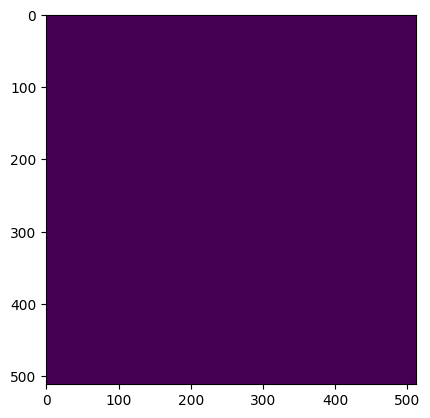

In [104]:
test_img = cv2.imread("/home/lepton/Downloads/sickle-edofed/010319-05r1-S-A-S1-20190816160305/FieldPos199_EDOF_RGB.tiff", cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE, SIZE))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)

#predict_image = np.expand_dims(X_train[8,:,:,:], axis=0)
X_test_feature = feature_extractor.predict(test_img)
X_test_feature = X_test_feature.reshape(-1, X_test_feature.shape[3])

prediction = model.predict(X_test_feature)

prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image)

In [ ]:
cv2.imwrite("/home/lepton/Desktop/healthy2_rescaled.png",prediction_image)

True